In [877]:
# Here is where the machine learning and MVP predictions will take place
# Importing pandas and reading the data in

import pandas as pd
stats = pd.read_csv("before2022.csv")
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,18240,Mike Gale,PG,29.0,SAS,67.0,NaN,22.0,2.6,5.6,...,0.0,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24
17636,18241,Paul Griffin,C,26.0,SAS,82.0,NaN,22.1,2.1,3.8,...,0.0,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24
17637,18242,Sylvester Norris,C,22.0,SAS,17.0,NaN,11.1,1.1,2.5,...,0.0,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24
17638,18243,Tim Bassett,PF,28.0,SAS,12.0,NaN,13.7,1.0,2.8,...,0.0,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24


In [474]:
# Deleting column that is not needed
del stats["Unnamed: 0"]

In [475]:
# Trying to find missing or null values
pd.isnull(stats).sum()

Player        0
Pos           1
Age           1
Tm            1
G             1
GS          544
MP            1
FG            1
FGA           1
FG%          55
3P            1
3PA           1
3P%        2696
2P            1
2PA           1
2P%          91
eFG%         55
FT            1
FTA           1
FT%         526
ORB           1
DRB           1
TRB           1
AST           1
STL           1
BLK           1
TOV           1
PF            1
PTS           1
Year          0
Pts Won       0
Pts Max       0
Share         0
Team        151
W           151
L           151
W/L%        151
GB          151
PS/G        151
PA/G        151
SRS         151
dtype: int64

In [476]:
# Verifying that null data
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]]

,Player,FTA
3,Jerome Henderson,0.0
144,John Coker,0.0
159,Jason Sasser,0.0
170,Adrian Caldwell,0.0
186,Bruno Šundov,0.0
...,...,...
17470,Mark McNamara,0.0
17498,Luke Zeller,0.0
17551,Myron Brown,0.0
17573,Malcolm Lee,0.0


In [477]:
# Replacing the null values with 0 to avoid machine learning problems due to missing/null values
stats = stats.fillna(0)

In [478]:
# Figuring out which columns to use in order to make predictions
# Need the numeric columns
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [479]:
# Only assigned the numeric columns to predictors
# Did not include numeric columns like "Pts Won" or "Share" because they would tell the algorithm what we are trying to predict
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [480]:
# Setting up training dataframe to take all stats prior to 2021
train = stats[stats["Year"] < 2021]

In [876]:
# Setting up test data to be of 2021
test = stats[stats["Year"] == 2021]
test

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
697,Aaron Gordon,PF,25.0,DEN,50.0,50.0,27.7,4.6,10.0,0.463,...,115.1,110.1,4.82,1.386651,1.609988,1.133094,1.686747,1.196897,3,10
698,Austin Rivers,SG,28.0,DEN,36.0,7.0,23.5,2.9,6.8,0.424,...,115.1,110.1,4.82,0.883431,1.157179,1.294964,0.240964,1.496121,13,10
699,Bol Bol,PF,21.0,DEN,32.0,2.0,5.0,0.8,1.8,0.431,...,115.1,110.1,4.82,0.246019,0.100624,0.161871,0.722892,0.299224,3,10
700,Facundo Campazzo,PG,29.0,DEN,65.0,19.0,21.9,1.8,4.8,0.381,...,115.1,110.1,4.82,0.682143,1.811236,1.942446,0.481928,1.196897,6,10
701,Greg Whittington,PF,27.0,DEN,4.0,0.0,3.0,0.0,0.8,0.000,...,115.1,110.1,4.82,0.000000,0.000000,0.000000,0.000000,0.000000,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Patty Mills,PG,32.0,SAS,68.0,1.0,24.8,3.7,9.0,0.412,...,111.1,112.8,-1.58,1.207728,1.207491,0.971223,0.000000,2.393794,6,33
17395,Quinndary Weatherspoon,SG,24.0,SAS,20.0,0.0,6.1,0.8,1.8,0.457,...,111.1,112.8,-1.58,0.257201,0.201248,0.647482,0.240964,0.099741,13,33
17396,Rudy Gay,PF,34.0,SAS,63.0,1.0,21.6,4.2,10.0,0.420,...,111.1,112.8,-1.58,1.274824,0.704370,1.133094,1.445783,1.695604,3,33
17397,Tre Jones,PG,21.0,SAS,37.0,1.0,7.3,1.0,2.1,0.474,...,111.1,112.8,-1.58,0.279567,0.553433,0.323741,0.000000,0.099741,6,33


In [483]:
# Using ridge regression model to avoid overfitting
from sklearn.linear_model import Ridge

# Initialize the model
reg = Ridge(alpha = .1)

In [484]:
# Fitting the model based on all of the predictors
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [485]:
# Performing predictions
predictions = reg.predict(test[predictors])

In [878]:
# converting predictions to a pd data frame to make it easier to read and work with
predictions = pd.DataFrame(predictions, columns = ["predictions"], index = test.index)
predictions

,predictions
697,0.015185
698,-0.014329
699,0.004393
700,-0.000517
701,0.013642
...,...
17394,-0.014474
17395,-0.011162
17396,0.017915
17397,-0.019129


In [488]:
# Comparing predictions with the real values
# Adding predictions column to make it easy to compare to the share column
combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
combination

In [490]:
# Sorting the dataframe to see who actually won the MVPs
combination.sort_values("Share", ascending = False).head(10)

,Player,Share,predictions
708,Nikola Jokić,0.961,0.168744
10106,Joel Embiid,0.580,0.176538
4228,Stephen Curry,0.449,0.152611
11681,Giannis Antetokounmpo,0.345,0.204506
1456,Chris Paul,0.138,0.080586
13791,Luka Dončić,0.042,0.155320
8900,Damian Lillard,0.038,0.128654
4113,Julius Randle,0.020,0.096744
4108,Derrick Rose,0.010,0.033912
14152,Rudy Gobert,0.008,0.098942


In [491]:
# Identifying an error metric to see if the algorithmm is doing well or not
from sklearn.metrics import mean_squared_error
mean_squared_error(combination["Share"], combination["predictions"])

0.0026839679788521983

In [492]:
# This shows that most players in the NBA do not receive MVP votes so we should only concern ourselves with the people who do
combination["Share"].value_counts()

0.000    525
0.001      3
0.042      1
0.580      1
0.038      1
0.449      1
0.008      1
0.961      1
0.345      1
0.010      1
0.003      1
0.020      1
0.138      1
0.005      1
Name: Share, dtype: int64

In [493]:
# Here I added in a rank column in order of MVP votes based on the real share
combination = combination.sort_values("Share", ascending = False)
combination["Rk"] = list(range(1, combination.shape[0]+1))
combination.head(10)

In [495]:
# Here I added in a predicted rank column in order to show who the algorithm predicted to win the MVPs
combination = combination.sort_values("predictions", ascending = False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0]+1))
combination.head(10)

In [497]:
# I decided to design the algorithm to aim to correctly predict the top 5 vote getters
# Here I am sorting based off of shares to view and compare actual values to predicted values
combination.sort_values("Share", ascending = False).head(10)

,Player,Share,predictions,Rk,Predicted_Rk
708,Nikola Jokić,0.961,0.168744,1,3
10106,Joel Embiid,0.580,0.176538,2,2
4228,Stephen Curry,0.449,0.152611,3,6
11681,Giannis Antetokounmpo,0.345,0.204506,4,1
1456,Chris Paul,0.138,0.080586,5,31
13791,Luka Dončić,0.042,0.155320,6,5
8900,Damian Lillard,0.038,0.128654,7,10
4113,Julius Randle,0.020,0.096744,8,20
4108,Derrick Rose,0.010,0.033912,9,78
14152,Rudy Gobert,0.008,0.098942,10,18


In [498]:
# For this to happen I gave 1 point for every correct prediction of a player in the top 5 MVP votes
# I also need to know how long it takes for the actual top 5 vote getters to be found in the predictions
# For example in the previous table you can see how Jokic, Embiid and Giannis were all correctly predicted in the top 5 which is great
# On the other hand, Curry placed 3rd but was predicted 6th which is not terrible, but not what I am aiming for. This would lead to penalizing because it took 6 tries to predict where he placed
# The same thing for Chris Paul. He placed 5th but was predicted 33rd which was way off and leads to being heavily penalized. It took 33 tries to predict where he placed


In [499]:
# Here I am using find_ap to help design the algorithm
# I only want to view the top 5 vote getters so I assigned that to 'actual'
# 'predicted' shows all of the predictions in order
# found and seen are both initialized
# found is how many top 5 vote getters were found
# seen is how many total records have been seen

# The for loop is set up to add 1 point to 'found' for every top 5 player found
# If the player is not found then 1 point is added to 'seen'

def find_ap(combination):
    actual = combination.sort_values("Share", ascending = False).head(5)
    predicted = combination.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [500]:
# The higher this is, the better. Helps to predict the top 5 MVP players
# The lower this is, the longer it takes the predictions to find the actual top 5 players
# 1.00 is perfect

find_ap(combination)

0.7655913978494623

In [501]:
# Now I will make predictions for all of the years instead of just 1
years = list(range(1980, 2022))

In [502]:
years[7]

1987

In [503]:
# Here is where Back Testing comes which is very useful
# It allows us to train and test on several different years
# The more years we can test the better. If it is training on 1 year that can lead to issues due to 'weird' seasons (Ex. Bubble)

aps = []
all_predictions = []

# This is a loop to make the training set from 1980 - 1986. It allows for predictions to be made from 1986 - 2021
for year in years[7:]:
# Training Set
    train = stats[stats["Year"] < year]
# Testing Set
    test = stats[stats["Year"] == year]
    
# Applying Back Testing
    reg.fit(train[predictors], train["Share"])
    
# Predictions using the model
    predictions = reg.predict(test[predictors])

# Predictions into dataframe
    predictions = pd.DataFrame(predictions, columns = ["predictions"], index = test.index)

# Combining the predictions with the data
    combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
# List that makes predictions for each year
    all_predictions.append(combination)
    aps.append(find_ap(combination))
    

In [504]:
# Average precision
# The precision does look better, and is somewhat accurate and it is over a 35 year span. 
sum(aps) / len(aps)

0.7804723077164211

In [505]:
# Any year before 1987 is the training set and 1987 is the test set


In [506]:
# Here I use add_ranks to diagnose the algorithm
# Sorting data frame by share of MVP votes + adding new rank for prediction too
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending = False)
    combination["Rk"] = list(range(1, combination.shape[0]+1))
    combination = combination.sort_values("predictions", ascending = False)
    combination["Predicted_Rk"] = list(range(1, combination.shape[0]+1))
# This lets us know the difference between predicted rank and actual rank    
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [507]:
# Shows the top 5 MVP vote getters for the 1997 season + their predicted rank + the difference
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] < 6].sort_values("Diff", ascending = False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
11177,Larry Bird,0.659,0.244692,2,1,1
33,Magic Johnson,0.635,0.162468,3,3,0
3977,Charles Barkley,0.136,0.140518,4,4,0
14468,Michael Jordan,0.831,0.185649,1,2,-1
15670,Clyde Drexler,0.108,0.117550,5,6,-1


In [508]:
# Creating Back Testing function to avoid copying same code repeatedly
# Makes it easier to play around with the data

def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[7:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns = ["predictions"], index = test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [509]:
# Prediction code
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [510]:
# Shows the same precision as before
mean_ap

0.7804723077164211

In [511]:
# Here is where I look deeper into diagnostic
# This shows the top 5 vote getters with the biggest differences between their rank and their predicted rank
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
9716,Glen Rice,0.117,0.039994,5,43,-38
6405,Steve Nash,0.839,0.055092,1,30,-29
1456,Chris Paul,0.138,0.080586,5,31,-26
15867,Joakim Noah,0.258,0.057527,4,24,-20
6423,Steve Nash,0.739,0.072361,1,20,-19
9984,Peja Stojaković,0.228,0.052415,4,21,-17
1004,Allen Iverson,0.270,0.012976,4,18,-14
1291,Jason Kidd,0.712,0.060653,2,16,-14
4234,Chauncey Billups,0.344,0.074893,5,18,-13
6438,Steve Nash,0.785,0.088141,2,14,-12


In [874]:
# Here I combined pandas series and coef_
# This shows the stat types that the system deems to be most effective and important
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis = 1).sort_values(0, ascending = False)

,0,1
22,0.109864,BLK
29,0.097243,W/L%
34,0.057088,PTS_R
13,0.054451,eFG%
18,0.028549,DRB
21,0.026003,STL
10,0.022799,2P
17,0.015690,ORB
20,0.009514,AST
7,0.005724,3P


In [513]:
# Here I added more predictors
# I want to find out what the average of each stat type is for each season
# Then I want to divide each player's averages by the mean
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [514]:
# Here are the ratio of stats
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,0.674727,0.313068,0.778905,1.341719,0.00,1.0
1,1.623563,0.983927,1.427992,0.447240,3.84,1.0
2,2.108523,1.207547,1.427992,2.236198,0.00,1.0
3,0.421705,0.000000,0.000000,0.000000,0.00,1.0
4,2.466972,1.565339,1.038540,3.577918,0.00,1.0
...,...,...,...,...,...,...
17635,0.669490,2.010657,2.120711,0.419118,0.00,1.0
17636,0.639059,1.283398,1.178173,1.257353,0.00,1.0
17637,0.243451,0.171120,0.235635,1.466912,0.00,1.0
17638,0.284026,0.513359,0.824721,0.000000,0.00,1.0


In [515]:
# This shows the ratio between each player's stats compared to the average
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [516]:
# This shows the ratio of each player's stats compared to the league
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.756,0.0,117.3,109.5,6.84,0.674727,0.313068,0.778905,1.341719,0.00
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.756,0.0,117.3,109.5,6.84,1.623563,0.983927,1.427992,0.447240,3.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,0.756,0.0,117.3,109.5,6.84,2.108523,1.207547,1.427992,2.236198,0.00
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.756,0.0,117.3,109.5,6.84,0.421705,0.000000,0.000000,0.000000,0.00
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,0.756,0.0,117.3,109.5,6.84,2.466972,1.565339,1.038540,3.577918,0.00


In [517]:
# Add the ratio values to predictors
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [518]:
# Same prediction code as before
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [519]:
# Slightly decreased
mean_ap

0.7751196579310086

In [520]:
# Here is where the position that a player plays and their team comes in
# Some people say that these things make a difference in the MVP voting
# These are strings and categories so we will turn them into numerical values in order to turn it into a number

stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [521]:
# This shows the different kinds of positions assigned to players in the data
stats["Pos"].unique()

array(['PF', 'SG', 'SF', 'C', 'PG', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SF-C', 0],
      dtype=object)

In [522]:
# This shows that the 2 columns were added
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,117.3,109.5,6.84,0.674727,0.313068,0.778905,1.341719,0.00,3,17
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,117.3,109.5,6.84,1.623563,0.983927,1.427992,0.447240,3.84,13,17
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,117.3,109.5,6.84,2.108523,1.207547,1.427992,2.236198,0.00,9,17
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,117.3,109.5,6.84,0.421705,0.000000,0.000000,0.000000,0.00,1,17
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,117.3,109.5,6.84,2.466972,1.565339,1.038540,3.577918,0.00,1,17


In [523]:
# This shows the unique values in Ntm which are related to teams. For example 7 could be the NY Knicks and 27 could be the LA Lakers
# The problem is that a higher number does not matter
stats["NTm"].value_counts()


8     652
29    647
12    647
1     638
33    638
13    636
20    636
10    625
17    624
9     623
2     621
14    620
11    619
26    619
6     618
37    612
30    612
31    610
16    594
32    534
19    518
22    499
28    489
21    479
36    421
35    409
39    387
18    331
40    265
27    214
5     209
3     165
4     157
25    145
23    143
7     113
38     88
15     77
34     73
24     32
0       1
Name: NTm, dtype: int64

In [369]:
# Here is where I used random forest to create decision trees and make predictions
# The higher min_sample_split is, the faster it is due to less overfitting
# The lower min_sample_split is, the more accurate it will be but the more chance of overfitting

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 1, min_samples_split = 5)

# This is the same prediction code as before but I swapped out rg with rf and also set it to year 28
# This will only make predictions for 3 years since it starting at year 28 (2019)
mean_ap, aps, all_predictions = backtest(stats, rf, years[28:], predictors)

In [370]:
# Random Forest is more accurate than the linear model
mean_ap

0.8033080814352908

In [271]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)

In [272]:
# Linear Model not as accurate
mean_ap

0.7751196579310086

In [683]:
# This is the code used to predict the top 5 NBA MVP getters of the 2022 season

allStats = pd.read_csv("nbaPlayerMvpStats.csv")
del allStats["Unnamed: 0"]
allStats[pd.isnull(allStats["FT%"])][["Player", "FTA"]]
allStats = allStats.fillna(0)
allStats.columns

allStatsRatios = allStats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())
allStats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = allStatsRatios[["PTS", "AST", "STL", "BLK", "3P"]]

predictors2022 = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

test2022 = allStats[allStats["Year"] == 2022]

predictions2022 = reg.predict(test2022[predictors])
predictions2022 = pd.DataFrame(predictions2022, columns = ["Prediction"], index = test2022.index)
predictors2022 += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

combination2022 = pd.concat([test2022[["Year", "Player"]], predictions2022], axis = 1)
combination2022 = combination2022.sort_values("Prediction", ascending = False).head(10)
combination2022["Rank"] = list(range(1, combination2022.shape[0]+1))
#combination2022.loc[:, "Prediction"] = combination2022["Prediction"].map('{:.2%}'.format)

In [883]:
# The predicted top 5 MVP vote getters for 2022
top5 = combination2022.head(5)
top5

,Year,Player,Prediction,Rank
14472,2022,Giannis Antetokounmpo,0.216370,1
730,2022,Nikola Jokić,0.210329,2
904,2022,Joel Embiid,0.185990,3
14263,2022,Luka Dončić,0.160792,4
9677,2022,LeBron James,0.160384,5


Text(0, 0.5, 'Prediction')

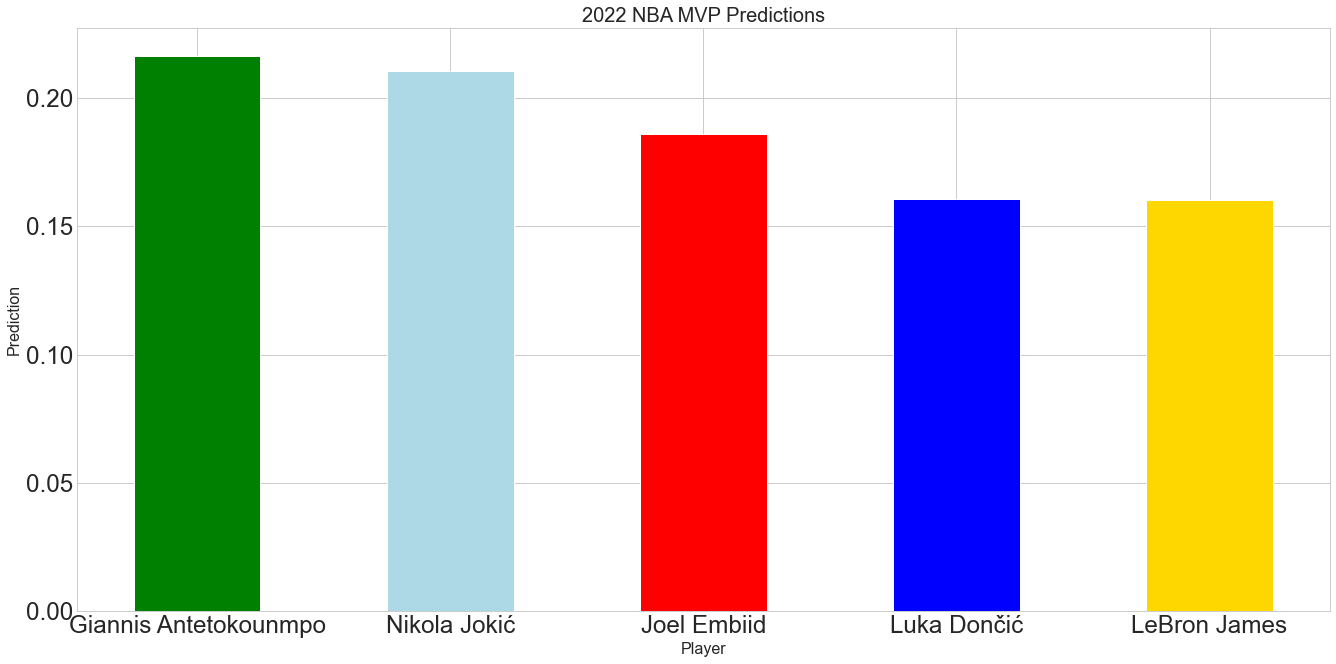

In [871]:
# Chart showing the top 5
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('seaborn-whitegrid') 
plt.figure(figsize = (20, 10))
colors_list = ['Green', 'Lightblue', 'Red', 'Blue', 'Gold']
graph = plt.bar(top5["Player"], top5["Prediction"], color = colors_list, width = 0.5)
plt.title('2022 NBA MVP Predictions', fontsize = 20)
plt.xlabel('Player', fontsize = 16)
plt.ylabel("Prediction", fontsize = 16)

In [797]:
# Playing around and ordering the different stat types

allStats.corr()["Share"].sort_values(0, ascending = False)
allCoreStats = allStats[['FT', 'FTA', 'PTS', 'PTS_R', 'FG', '2P', '2PA', 'FGA', 'TOV', 'DRB', 'AST', 'AST_R', 'TRB', 'STL', 'STL_R', 'GS', 'MP', 'BLK', 'BLK_R', 'SRS', 'W/L%', 'ORB', 'W', 'G', '3P_R', '3PA', '3P', 'PF', 'FG%', '2P%', 'eFG%', 'FT%', '3P%']]
coreStats = allStats[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FT']]
coreRatioStats = allStats[['PTS_R', 'AST_R', 'STL_R', 'BLK_R']]
scoreStats = allStats[['PTS', 'FT', 'FG','2P', '3P']]

,PTS,AST,TRB,STL,BLK,TOV,FT
0,6.4,0.7,4.6,0.6,0.6,1.2,1.2
1,15.4,2.2,2.5,1.1,0.2,1.4,1.8
2,20.0,2.7,5.2,1.1,1.0,2.0,3.2
3,4.0,0.0,1.0,0.0,0.0,0.0,0.0
4,23.4,3.5,6.1,0.8,1.6,2.6,4.3
...,...,...,...,...,...,...,...
18240,6.6,4.7,2.3,1.8,0.2,1.7,1.4
18241,6.3,3.0,5.3,1.0,0.6,1.6,2.1
18242,2.4,0.4,2.5,0.2,0.7,1.1,0.2
18243,2.8,1.2,2.8,0.7,0.0,0.8,0.8


<AxesSubplot:>

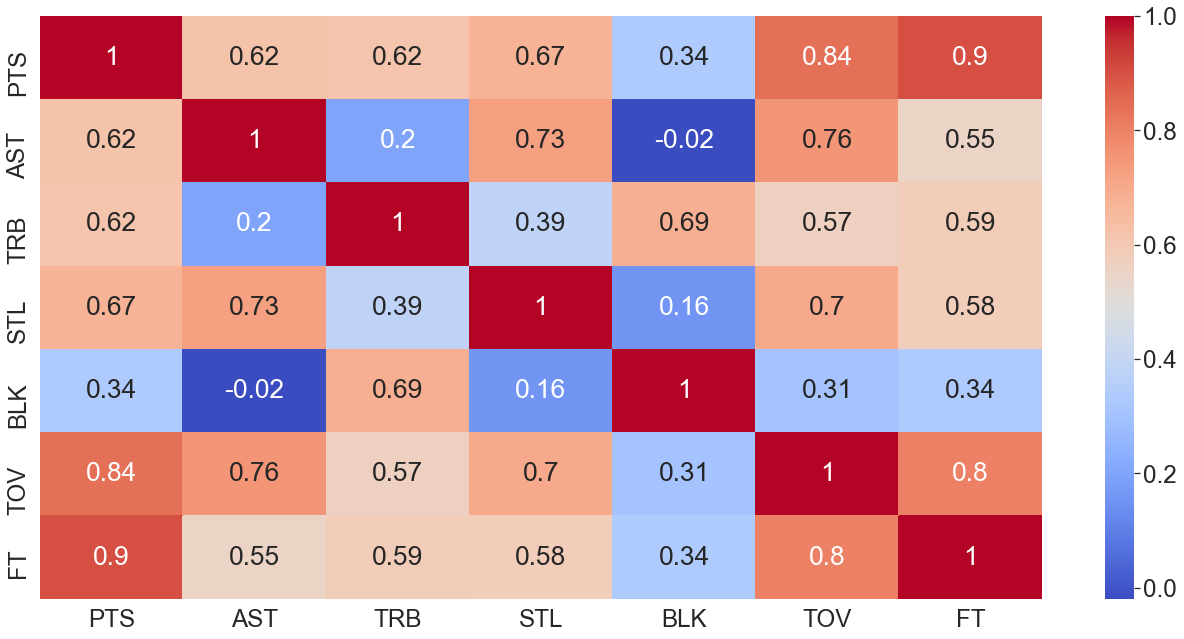

In [842]:
# Here is a heatmap that shows the correlation of the core stats in MVP voting
sns.set(font_scale=2.2)
allCoreStats.corr()
plt.figure(figsize = (20,10))
sns.heatmap(coreStats.corr(), annot = True, cmap = "coolwarm")

<AxesSubplot:>

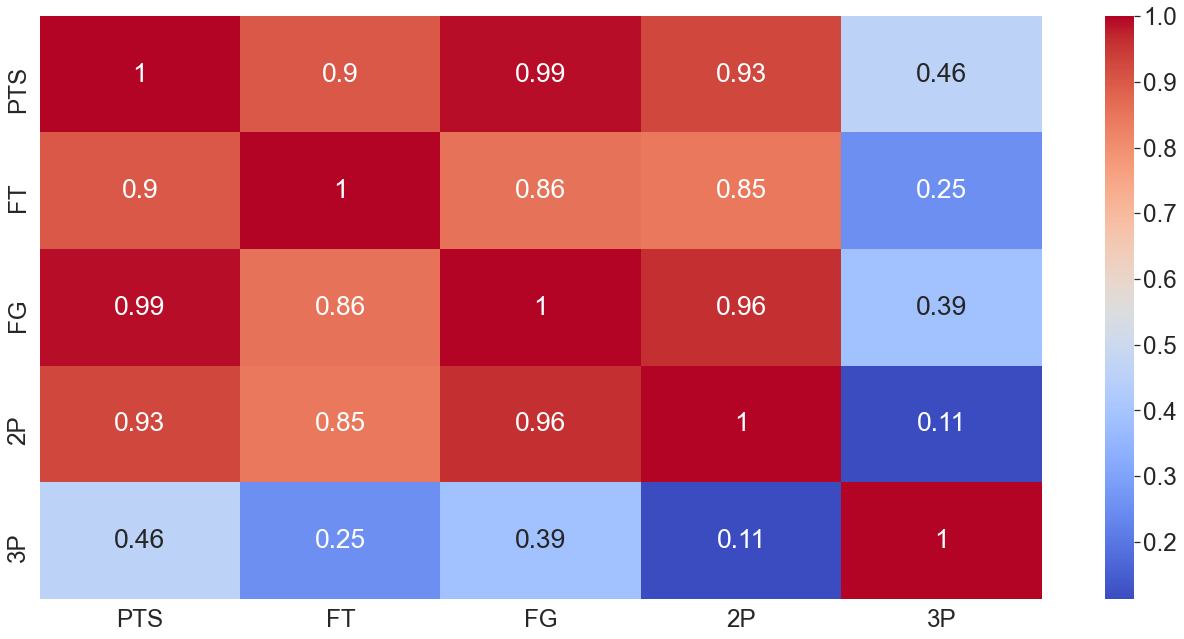

In [843]:
# Here is a heatmap that shows the correlation of the scoring stats
sns.set(font_scale=2.2)
allCoreStats.corr()
plt.figure(figsize = (20,10))
sns.heatmap(scoreStats.corr(), annot = True, cmap = "coolwarm")

In [708]:
# Here is the most important categories based on the algorithm
allStats.corr()["Share"].sort_values(0, ascending = False)

Share      1.000000
Pts Won    0.983030
Pts Max    0.513650
FT         0.315787
FTA        0.315744
PTS        0.286984
PTS_R      0.286439
FG         0.273658
2P         0.271259
2PA        0.249075
FGA        0.248630
TOV        0.231891
DRB        0.215745
AST        0.200926
AST_R      0.200560
TRB        0.193862
STL        0.183763
STL_R      0.181772
GS         0.170044
MP         0.168507
BLK        0.152736
BLK_R      0.149784
SRS        0.125506
W/L%       0.120968
ORB        0.119984
W          0.119484
G          0.090303
3P_R       0.086381
3PA        0.078886
3P         0.078644
PF         0.072537
FG%        0.068442
2P%        0.063366
eFG%       0.061252
FT%        0.045919
PS/G       0.035729
3P%        0.027571
Age        0.020307
PA/G       0.009036
Year      -0.018744
L         -0.095285
GB        -0.097868
Name: Share, dtype: float64

top3

In [846]:
# From this point on I just played with the data
giannis = test2022[test2022["Player"] == "Giannis Antetokounmpo"]
jokic = test2022[test2022["Player"] == "Nikola Jokić"]
embiid = test2022[test2022["Player"] == "Joel Embiid"]
luka = test2022[test2022["Player"] == "Luka Dončić"]
lebron = test2022[test2022["Player"] == "LeBron James"]

giannis = giannis[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PTS_R', 'AST_R', 'STL_R', 'BLK_R']]
jokic = jokic[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV','PTS_R', 'AST_R', 'STL_R', 'BLK_R']]
embiid = embiid[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PTS_R', 'AST_R', 'STL_R', 'BLK_R']]
luka = luka[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PTS_R', 'AST_R', 'STL_R', 'BLK_R']]
lebron = lebron[['Player', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PTS_R', 'AST_R', 'STL_R', 'BLK_R']]

In [847]:
giannis

,Player,PTS,AST,TRB,STL,BLK,TOV,PTS_R,AST_R,STL_R,BLK_R
14472,Giannis Antetokounmpo,29.9,5.8,11.6,1.1,1.4,3.3,3.628495,3.104486,1.812858,3.788014


In [848]:
embiid

,Player,PTS,AST,TRB,STL,BLK,TOV,PTS_R,AST_R,STL_R,BLK_R
904,Joel Embiid,30.6,4.2,11.7,1.1,1.5,3.1,3.713443,2.248076,1.812858,4.058587


In [849]:
jokic

,Player,PTS,AST,TRB,STL,BLK,TOV,PTS_R,AST_R,STL_R,BLK_R
730,Nikola Jokić,27.1,7.9,13.8,1.5,0.9,3.8,3.288703,4.228523,2.472078,2.435152


In [864]:
ok = pd.concat([pd.Series(reg.coef_), pd.Series(predictors2022)], axis = 1).sort_values(0, ascending = False)
ok

,0,1
22,0.109864,BLK
29,0.097243,W/L%
34,0.057088,PTS_R
13,0.054451,eFG%
18,0.028549,DRB
21,0.026003,STL
10,0.022799,2P
17,0.015690,ORB
20,0.009514,AST
7,0.005724,3P


In [ ]:
# 5/5/22